# Exploración y pre-procesamiento de la data

In [1]:
# Importo las librerías iniciales que voy a usar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Abro los archivos de training y testing que da la competencia
df_test = pd.read_csv('test.csv', index_col=0)
df_train = pd.read_csv('train.csv', index_col=0)

## Procesamiento de "train" dataset

In [3]:
# Exploro el archivo train
print(f'Tamaño del df:', df_train.shape)
print(f'Tipos de datos en las columnas:')
print(df_train.dtypes.value_counts())
#df_train.describe()

Tamaño del df: (1460, 80)
Tipos de datos en las columnas:
object     43
int64      34
float64     3
dtype: int64


In [4]:
# Miro las primeras 10 filas para tener una idea
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [5]:
# Miro que columnas son las que tiene
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

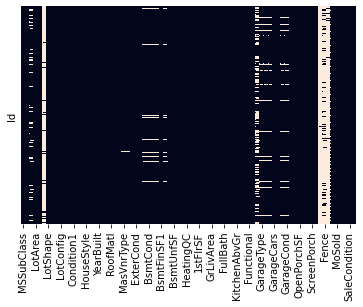

In [6]:
# Chequeo en que columnas hay valores nan
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False)
df_train.columns[df_train.isna().any()]

In [7]:
# Me fijo cuantos valores nan hay en cada una de esas columnas
columns_with_nan = df_train.isna().sum().sort_values(ascending=False).head(20)
columns_with_nan

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [8]:
# Tiro aquellas columnas que tienen mas del 60% con nan values
df_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
df_train.shape

(1460, 76)

In [9]:
# Chequeo si hay rows que tengan muchos nan values
df_train.isnull().sum(axis=1).sort_values(ascending=False)
# las rows que tienen nan values solo tienen 11 nan de 76 values que pueden tener
# no elimino ninguna

Id
521     11
706     11
534     11
1219    11
1012    11
        ..
512      0
511      0
1112     0
509      0
1163     0
Length: 1460, dtype: int64

In [10]:
# Llenos las 15 columnas que tienen valores nan

# Para eso defino una función que después puedo volver a usar
def lleno_nan(df):
    ''' Completa los valores nan de un dataframe,
    si la columna es numérica le coloca la media y si es categórica la moda'''
    columns_with_nan = df.columns[df.isna().any()]
    for x in columns_with_nan:
        if df[x].dtype == int or df[x].dtype == float:
            df[x] = df[x].fillna(df[x].mean())
        else:
            df[x] = df[x].fillna(df[x].mode()[0])
    return df

df_train = lleno_nan(df_train)

## Procesamiento "test" dataset

In [11]:
# Exploro el archivo test
print(f'Tamaño del df:', df_test.shape)
print(f'Tipos de datos en las columnas:')
print(df_test.dtypes.value_counts())

Tamaño del df: (1459, 79)
Tipos de datos en las columnas:
object     43
int64      25
float64    11
dtype: int64


Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

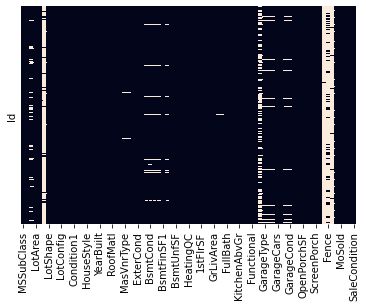

In [12]:
# Chequeo en que columnas hay valores nan
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False)
df_test.columns[df_test.isna().any()]

In [13]:
# Me fijo cuantos valores nan hay en cada una de esas columnas
df_test.isna().sum().sort_values(ascending=False).head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
Neighborhood       0
dtype: int64

In [14]:
# Tiro aquellas columnas que tienen mas del 60% con nan values
df_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
df_test.shape

(1459, 75)

In [15]:
# Lleno los nan values usando la función previamente descripta
df_test = lleno_nan(df_test)

# Chequeo si se llenaron bien
df_test.isna().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [16]:
print(f' Test df format: {df_test.shape} \n Train df format: {df_train.shape}')

 Test df format: (1459, 75) 
 Train df format: (1460, 76)


El train y el test set ya quedaron limpios en principio. Tienen formatos similares.

El test set tiene una columna menos que es el "SalePrice" a predecir.

## Data visualization and Feature selection/engeneering

### Numerical Features

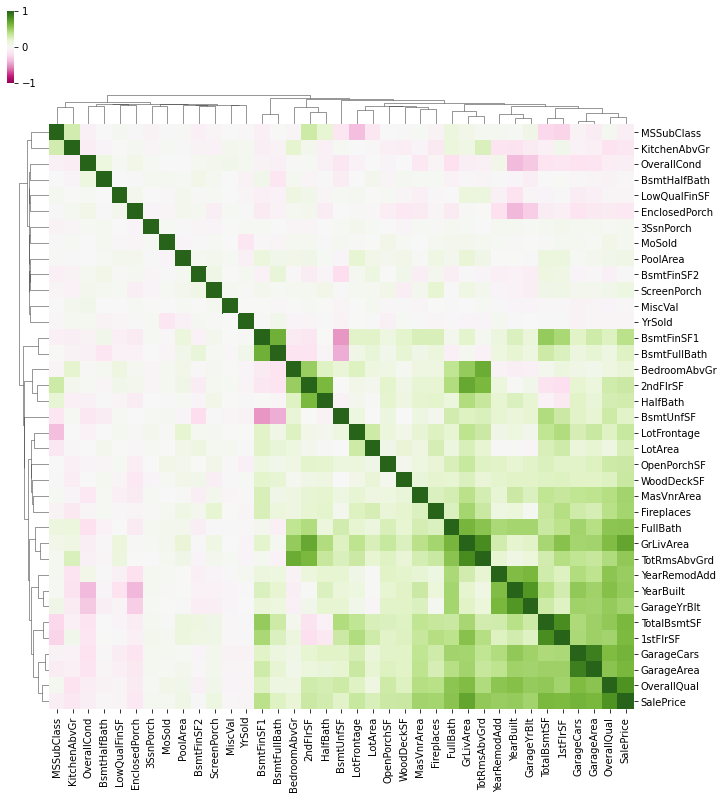

In [17]:
# Puede analizar la correlación entre las variables numéricas...
# El PairPlot me muestra la relación de una variable contra la otra para ver que tipo de co-relación tienen.
# Es un poco pesado para correrlo. En este caso debería hacerme un gráfico dot-plot de 76x76.
# sns.pairplot(df_train)

# Hago una matriz de correlación y la ploteo como heatmap (es más rápido)

ax = sns.clustermap(df_train.corr(), vmin=-1, vmax=1, dendrogram_ratio=(.05, .05), cbar_pos=(0, 1, 0.01, 0.1),
                   cmap='PiYG')
                
plt.show()
#df_train.corr()

**En este clustermap ya vemos que hay variables que no se correlacionan con el "SalePrice"**

In [18]:
# Me quedo con aquellas variables que mejor correlacionan con el SalePrice
# (correlación>0.4 o <-0.4)
correlation = df_train.corr()
SalePrice_correlacionan = list(correlation.loc[(correlation.SalePrice>0.4) | (correlation.SalePrice<-0.4), 'SalePrice'].index)
SalePrice_correlacionan = SalePrice_correlacionan[:-1]
correlation.loc[(correlation.SalePrice>0.4) | (correlation.SalePrice<-0.4), 'SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.470177
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [19]:
# De estas que correlacionan mejor me fijo si hay alguna de esas que tenían nan
correlacionan_nan = [x for x in SalePrice_correlacionan if x in columns_with_nan[:19].index.tolist()]

for x in correlacionan_nan:
    print(x)
    print(correlation.loc[(correlation[x]>0.7) | (correlation[x]<-0.7), x])
    print('*'*10)

MasVnrArea
MasVnrArea    1.0
Name: MasVnrArea, dtype: float64
**********
GarageYrBlt
YearBuilt      0.780555
GarageYrBlt    1.000000
Name: GarageYrBlt, dtype: float64
**********


MasVnrArea no correlaciona con nada.

GarageYrBlt correlaciona bastante bien con YearBuilt. Tiro GarageYrBlt.

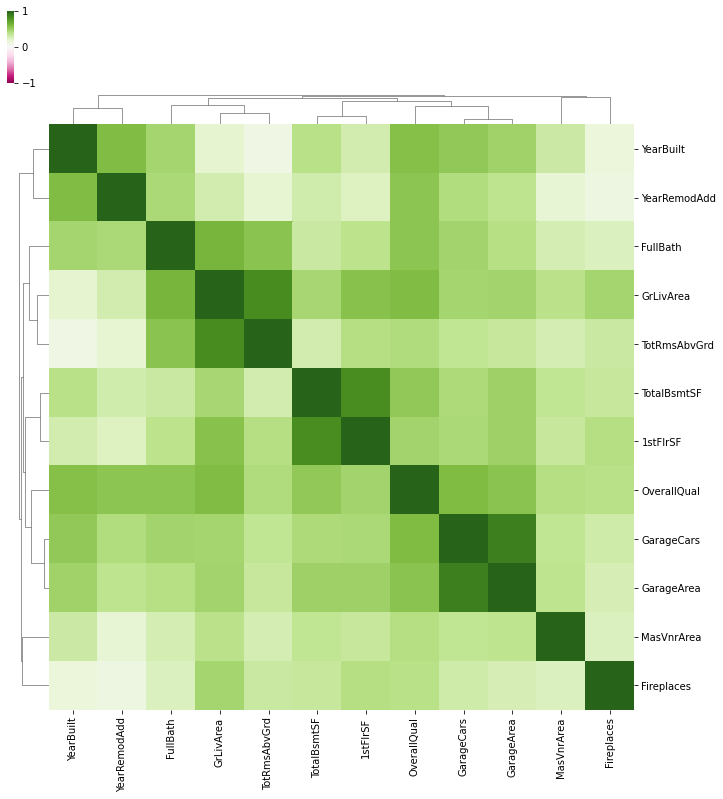

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
OverallQual,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,1.00000,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,0.81953,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.825489,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
TotRmsAbvGrd,NaN,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,1.000000,NaN,NaN,NaN
Fireplaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [20]:
SalePrice_correlacionan.remove('GarageYrBlt')

# Me fijo como se correlacionan las features seleccionadas
selected_features_correlation = correlation.loc[SalePrice_correlacionan, SalePrice_correlacionan]
ax = sns.clustermap(selected_features_correlation, vmin=-1, vmax=1, dendrogram_ratio=(.05, .05), cbar_pos=(0, 1, 0.01, 0.1),
                   cmap='PiYG')
                
plt.show()

selected_features_correlation[selected_features_correlation>0.7]

GarageCars y GarageArea correlacionan bastante bien con casi 0.9 de coeficiente.

Me quedo con GarageCars porque correlaciona mejor con SalePrice.

In [21]:
SalePrice_correlacionan.remove('GarageArea')

<AxesSubplot:>

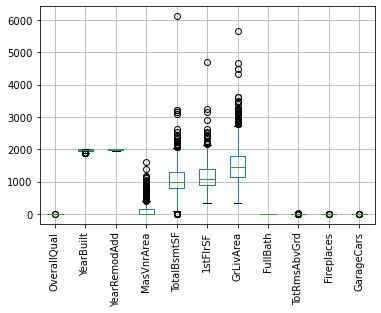

In [22]:
df_train.loc[:, SalePrice_correlacionan].boxplot(rot=90)

In [23]:
df_train_numerical = df_train[SalePrice_correlacionan+['SalePrice']]
df_train_numerical

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
Id,,,,,,,,,,,,
1,7,2003,2003,196.0,856,856,1710,2,8,0,2,208500
2,6,1976,1976,0.0,1262,1262,1262,2,6,1,2,181500
3,7,2001,2002,162.0,920,920,1786,2,6,1,2,223500
4,7,1915,1970,0.0,756,961,1717,1,7,1,3,140000
5,8,2000,2000,350.0,1145,1145,2198,2,9,1,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,0.0,953,953,1647,2,7,1,2,175000
1457,6,1978,1988,119.0,1542,2073,2073,2,7,2,2,210000
1458,7,1941,2006,0.0,1152,1188,2340,2,9,2,1,266500


Me quedan 11 features numéricas seleccionadas (lista SalePrice_correlacionan). La escala de los valores de cada una de esas features tiene distintas escalas (boxplot). Si usamos RandomForest no haría falta normalizar/estandarizar pero si usamos otro método (regresiones) si haría falta.

Pero tengo también muchas variables categóricas que pueden aportar al modelo de ML.
Para analizar estas variables categóricas debo codificarlas con 1 y 0. Puedo usar one-hot-encoding (dummies).

### Categorical Features

In [24]:
# Me quedo con las variables categoricas y chequeo cuantas categorías tiene cada una.
# Además analizo como es la distribución por categorías
categorical_features = df_train.dtypes[df_train.dtypes == 'object'].index

for x in categorical_features:
    print('*'*20)
    print(df_train.loc[:,x].value_counts())


********************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
********************
Pave    1454
Grvl       6
Name: Street, dtype: int64
********************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
********************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
********************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
********************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
********************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
********************
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU      

In [25]:
# De los datos anteriores veo que las features "Street" y "Utilities" tienen solo dos categorías 
# y una distribución muy desigual. Puedo deshacerme de estas dos. 
categorical_features = list(categorical_features)
categorical_features.remove('Street')
categorical_features.remove('Utilities')

In [26]:
# Para cualquier algoritmo de machine learning tengo que codificar las variables categóricas de otra manera
# Preferentemente en un código de 1 y 0. Para eso debo usar one-hot-encoding

df_train_categorical = df_train[categorical_features+['SalePrice']]

# Lo hago usando dummies porque el one-hot-encoder de sklearn necesita categorías numéricas
df_train_categorical = pd.get_dummies(df_train_categorical, columns=categorical_features)


/home/mariano/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


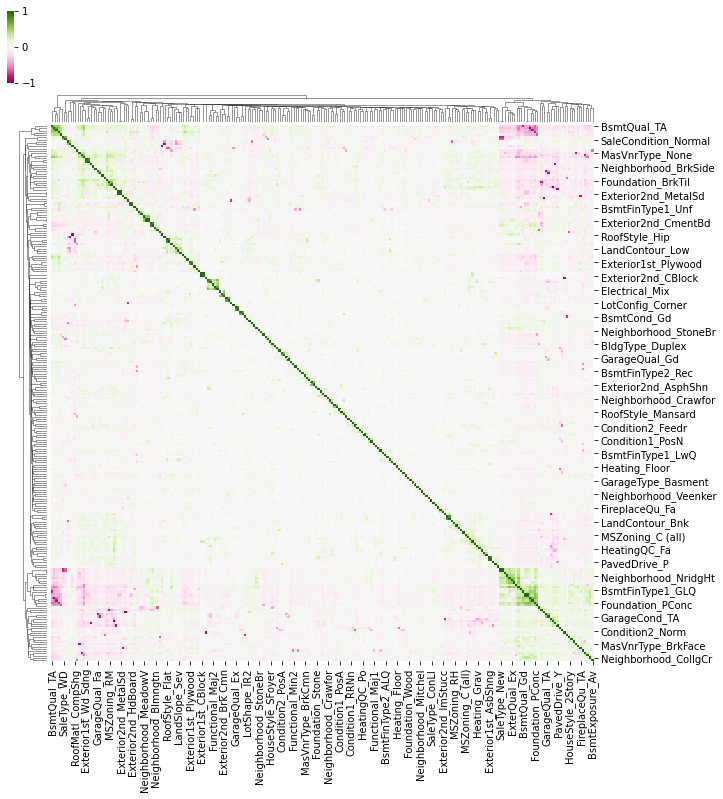

In [27]:
ax = sns.clustermap(df_train_categorical.corr(), vmin=-1, vmax=1, dendrogram_ratio=(.05, .05), cbar_pos=(0, 1, 0.01, 0.1),
                   cmap='PiYG')
                
plt.show()

# La primer linea del heatmap es el SalePrice
#df_train_categorical.corr()

In [28]:
# Me quedo con aquellas variables que mejor correlacionan con el SalePrice
# (correlación>0.4 o <-0.4)
correlation_categorical = df_train_categorical.corr()
SalePrice_correlacionan_categorical = list(correlation_categorical.loc[(correlation_categorical.SalePrice>0.4) | 
                                                                       (correlation_categorical.SalePrice<-0.4), 'SalePrice'].index)
SalePrice_correlacionan_categorical = SalePrice_correlacionan_categorical[1:]
correlation_categorical.loc[(correlation_categorical.SalePrice>0.4) | (correlation_categorical.SalePrice<-0.4), 'SalePrice']

SalePrice               1.000000
Neighborhood_NridgHt    0.402149
ExterQual_Ex            0.451164
ExterQual_Gd            0.452466
ExterQual_TA           -0.589044
Foundation_PConc        0.497734
BsmtQual_Ex             0.553105
BsmtQual_TA            -0.498545
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
KitchenQual_Ex          0.504094
KitchenQual_TA         -0.519298
GarageFinish_Fin        0.419678
GarageFinish_Unf       -0.513906
Name: SalePrice, dtype: float64

In [29]:
# Me genero un dataframe con las variables categóricas y el SalePrice
df_train_categorical = df_train_categorical[SalePrice_correlacionan_categorical+['SalePrice']]
df_train_categorical.shape

(1460, 14)

Me quedan 8 variables categóricas finalmente. Se desglosan en 13 codificadas por dummies.

In [30]:
# Junto el Dataset numérico con el categórico (merge on price) para tener el df_train_final

df_train_final = df_train_numerical.merge(df_train_categorical, on='SalePrice')

df_train_final = df_train_final[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
                               '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
                               'GarageCars', 'Neighborhood_NridgHt', 'ExterQual_Ex',
                               'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex',
                               'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'KitchenQual_Ex',
                               'KitchenQual_TA', 'GarageFinish_Fin', 'GarageFinish_Unf', 'SalePrice']]

df_train_final

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_TA,GarageFinish_Fin,GarageFinish_Unf,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,1,0,0,1,1,0,0,0,0,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,0,0,0,0,1,0,1,0,0,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,1,0,0,1,1,0,0,0,0,223500
3,7,2001,2002,162.0,920,920,1786,2,6,1,...,0,0,1,1,1,0,0,0,0,223500
4,5,1923,2004,0.0,1324,1072,1576,1,6,1,...,1,0,0,1,1,0,0,0,0,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,5,1970,1970,0.0,630,630,630,1,3,0,...,0,0,0,1,1,1,0,0,1,92000
6766,8,2008,2009,194.0,1573,1578,1578,2,7,1,...,1,0,0,0,1,1,0,1,0,287090
6767,7,1941,2006,0.0,1152,1188,2340,2,9,2,...,0,0,1,1,1,0,0,0,0,266500
6768,5,1950,1996,0.0,1078,1078,1078,1,5,0,...,0,0,1,1,0,0,0,0,1,142125


# Machine-Learning Model

Lo que se quiere predecir es un valor numérico. Para eso tengo variables numéricas y categóricas que describen cada uno de los casos (o entradas de la tabla). No todos los métodos de ML pueden usar una mezcla de tipos de variables. Uno de los más sencillos de abordar es el **RandomForest**. Otra ventaja del **RandomForest** es que no es necesario estandarizar/normalizar los datos numéricos (aunque hacerlo puede llegar a mejorar un poco la predicción).

In [31]:
# Primero separo las variables descriptivas de lo que quiero predecir
# Me quedo con todo menos con SalePrice como X
X = df_train_final.iloc[:,:-1]
# Me quedo solo con SalePrice como y
y = df_train_final.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separo el dataset de training en subsets training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # Mantener el random state me permite replicar resultados

# Comienzo con el Regressor (uso regressor y no classiffier porque la variable a predecir es numérica)
regressor = RandomForestRegressor(random_state=0)
# Fiteo el algoritmo a los subsets de entrenamiento
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [33]:
print(f'Regressor score on training subset:', regressor.score(X_train, y_train))
print(f'Regressor score on testing subset:', regressor.score(X_test, y_Btest))

Regressor score on training subset: 0.9910992838052778


NameError: name 'y_Btest' is not defined

Si bien parece que anda muy bien este predictor, seguramente haya overfitting porque no hubo optimización y limitación de los hiperparámetros del **RandomForest**. Esta clase de algoritmos tienden a overfittear bastante y además los parámetros default generan árboles de profundidad/ramas/hojas óptimas para el set de entrenamiento que también contribuye al overfitting.

In [ ]:
# Hiperparameter tunning con Cross-Validation 
# Randomized Search

from sklearn.model_selection import RandomizedSearchCV

# Número de árboles en el bosque
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Número máximo de niveles por árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras necesarias para abrir un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras por nodo
min_samples_leaf = [2, 4]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]
# Creación de la grilla random
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Se larga la búsqueda randomizada de hiperparámetros
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [77]:
print(f'Regressor best params:', rf_random.best_params_)
print(f'Regressor score on training subset:', rf_random.best_estimator_.score(X_train, y_train))
print(f'Regressor score on testing subset:', rf_random.best_estimator_.score(X_test, y_test))

Regressor best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
Regressor score on training subset: 0.9823605168273053
Regressor score on testing subset: 0.942139030096024


Baja un poco el score pero eso tiene que ver con el overfitting que tenía antes el regressor con los parámetros default.

In [89]:
# Basandome en los parámetros de la RandomizedSearch seteo parámetros de búsqueda para la GridSearch
# De esta forma optimizo un poco más los hiperparámetros.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60],
    'max_features': [6, 12, 'auto'], # Es el 50 y el 25% del total - evito overfitting
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 4],
    'n_estimators': [100, 200, 500]
}


# Largamos la GridSearch
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.1min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 40, 60],
                         'max_features': [6, 12], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [90]:
print(f'Regressor best params:', grid_search.best_params_)
print(f'Regressor score on training subset:', grid_search.best_estimator_.score(X_train, y_train))
print(f'Regressor score on testing subset:', grid_search.best_estimator_.score(X_test, y_test))

Regressor best params: {'bootstrap': True, 'max_depth': 40, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Regressor score on training subset: 0.9799782049441073
Regressor score on testing subset: 0.93389075305176


In [104]:
# Una vez que ya tengo los parámetros seteados puedo realizar una cross-validation 
# del modelo con todos los datos de el train set

regressor_final = RandomForestRegressor(bootstrap=True, max_depth=40, max_features=12, 
                                        min_samples_leaf=2, min_samples_split=2, n_estimators=200,
                                        random_state=0)

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

def CrossValidator(X, y):
    cv = StratifiedKFold(n_splits=10)
    rmse = []
    features_importances = []
    RMSE = []
    score = []
    for i, (train, test) in enumerate(cv.split(X, y)):
        regressor_final.fit(X.iloc[train], y.iloc[train])
        feature_imp = pd.Series(regressor_final.feature_importances_,index=X.columns).sort_values(ascending=False)
        features_importances.append(feature_imp)
        y_pred = regressor_final.predict(X.iloc[test])
        RMSE.append(np.sqrt(mean_squared_error(y.iloc[test], y_pred)))
        score.append(regressor_final.score(X.iloc[test], y.iloc[test]))
        print(f'Fold:', i)
        print(f'RootMeanSquaredError:', np.sqrt(mean_squared_error(y.iloc[test], y_pred)))
        print(f'Score:', regressor_final.score(X.iloc[test], y.iloc[test]))

    print('*'*20)
    print(f'Mean Metrics:')
    print(f'RMSE:', np.mean(RMSE))
    print(f'Score:', np.mean(score))

    plt.figure(figsize=(8,5))
    feat_impor_mean = pd.Series(sum(features_importances)/len(features_importances)).sort_values(ascending=False)
    sns.barplot(x=feat_impor_mean, y=feature_imp.index, color='grey')
    plt.xticks(rotation=40)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

CrossValidator(X, y)

In [133]:
features_finals = list(X.columns)

df_test = df_test[features_finals]

df_test = pd.get_dummies(df_test, columns=['ExterQual'])

df_test.drop(columns=['ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd'], inplace=True)


In [145]:
SalePrice = regressor_final.predict(df_test)

Id = list(df_test.index)

df = pd.DataFrame()
df['Id'] = Id
df['SalePrice'] = SalePrice
df.set_index('Id', drop=True, inplace=True)
df.to_csv('NIS_MM_submission_3.csv')

In [148]:
df = pd.read_csv('NIS_MM_submission_3.csv')
df

,Id,SalePrice
0,1461,127054.717281
1,1462,141284.561541
2,1463,156997.238674
3,1464,182034.326587
4,1465,195445.674080
...,...,...
1454,2915,82490.727262
1455,2916,83697.790449
1456,2917,149305.714972
1457,2918,109195.582518


In [147]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [93]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))